In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Tạo bộ dữ liệu

In [3]:
np.random.seed(42)
X = 2 * np.random.rand(200, 1)
true_w = 3.5
true_b = 2.0
noise = np.random.randn(200, 1) * 0.5
y = true_b + true_w * X + noise

### Trực quan hóa

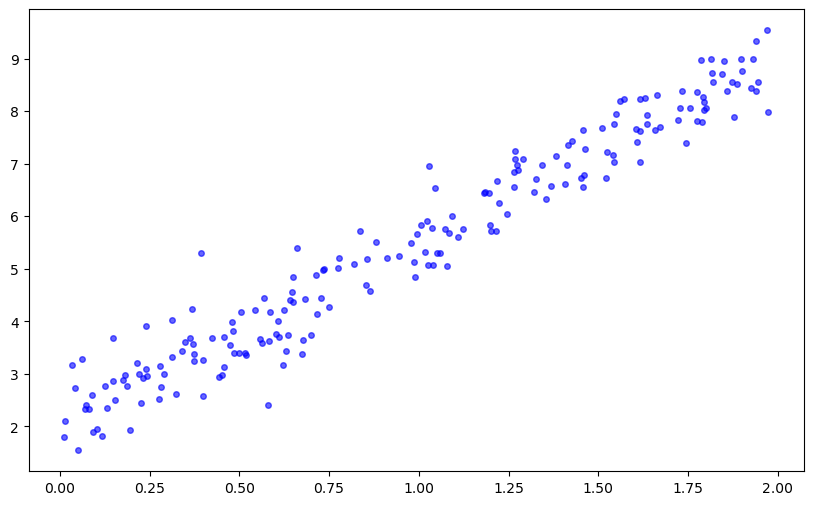

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.", markersize=8, alpha=0.6, label="Dữ liệu quan sát")
plt.show()

### Xây dựng hàm cần thiết

In [5]:
def compute_cost(x, y, w, b):
    n = x.shape[0]
    cost = 0
    for i in range(n):
        cost += (x[i] * w + b - y[i]) ** 2
    cost /= (2 * n)
    return cost

In [6]:
def gradient_descent(x, y, w, b):
    n = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(n):
        dj_dw += (x[i] * w + b - y[i]) * x[i]
        dj_db += (x[i] * w + b - y[i])
    dj_dw /= n
    dj_db /= n
    return (dj_dw, dj_db)

In [7]:
def fit(x, y):
    iterations = 2000
    alpha = 0.01
    epsilon = 1e-5
    train_w, train_b = 0, 0
    n = x.shape[0]
    for i in range(iterations):
        old_cost = compute_cost(x, y, train_w, train_b)
        dj_dw, dj_db = gradient_descent(x, y, train_w, train_b)
        train_w -= alpha * dj_dw
        train_b -= alpha * dj_db
        new_cost = compute_cost(x, y, train_w, train_b)
        if abs(new_cost - old_cost) < epsilon:
            break;
    return train_w, train_b

In [8]:
w, b = fit(X, y)

In [9]:
print(w, b)

[3.3539793] [2.19895079]


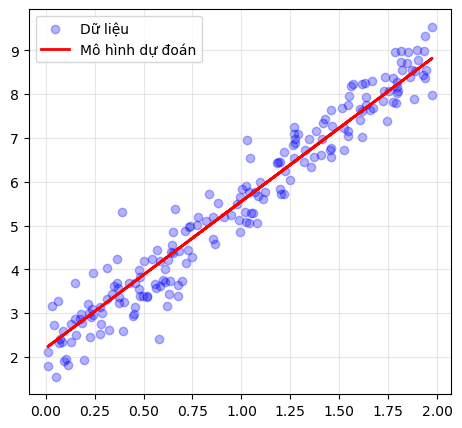

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.3, label='Dữ liệu')
plt.plot(X, w * X + b, 'r-', linewidth=2, label='Mô hình dự đoán')
plt.legend()
plt.grid(True, alpha=0.3)

### Thực nghiệm dự đoán giá nhà

In [62]:
class LinearRegressionFromScratch:
    def __init__(self, learning_rate= 0.01, num_iterations= 1500):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None
        self.costs = []
    def fit(self, X, y):
        '''
         X (m, n)
         y (m, 1)
        '''
        X = np.array(X, dtype=np.float64) 
        y = np.array(y, dtype=np.float64).reshape(-1, 1)
        m, n = X.shape
        self.w = np.zeros((n, 1))
        self.b = 0
        cost = 0
        for i in range(self.num_iterations):
            f_wb = np.dot(X, self.w) + self.b
            err = 1 / m * (f_wb - y) 
            dw = np.dot(X.T, err)
            db = np.sum(err)

            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            cost = 1 / (2 * m) * np.sum((f_wb - y) ** 2)
            if i % 100 == 0:
                self.costs.append(cost)
                print(f"Cost at iterations {i} is: {cost}")
    def predict(self, X):
        return np.dot(X, self.w) + self.b
        

In [11]:
df = pd.read_csv('Data/Housing.csv')

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [15]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [16]:
def binary_map(x):
    return x.map({'yes' : 1, 'no' : 0})
df[binary_cols] = df[binary_cols].apply(binary_map)

In [18]:
status = pd.get_dummies(df['furnishingstatus'], drop_first=True)
df = pd.concat([df, status], axis= 1)
df.drop(['furnishingstatus'], axis= 1, inplace= True)

In [41]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(['price'], axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, test_size= 0.2, random_state= 42)

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [79]:
model = LinearRegressionFromScratch(learning_rate= 0.1, num_iterations= 1500)

In [80]:
model.fit(X_train, y_train)

Cost at iterations 0 is: 12617396203243.809
Cost at iterations 100 is: 633367008337.9878
Cost at iterations 200 is: 565149347891.9884
Cost at iterations 300 is: 535091228024.46783
Cost at iterations 400 is: 518198332480.0899
Cost at iterations 500 is: 507552058135.88855
Cost at iterations 600 is: 500484700305.4517
Cost at iterations 700 is: 495675632227.3044
Cost at iterations 800 is: 492356204504.97363
Cost at iterations 900 is: 490041122387.6557
Cost at iterations 1000 is: 488412186468.2346
Cost at iterations 1100 is: 487256699549.0907
Cost at iterations 1200 is: 486430756093.0286
Cost at iterations 1300 is: 485836072612.96967
Cost at iterations 1400 is: 485404956873.011


In [81]:
y_pred = model.predict(X_test)

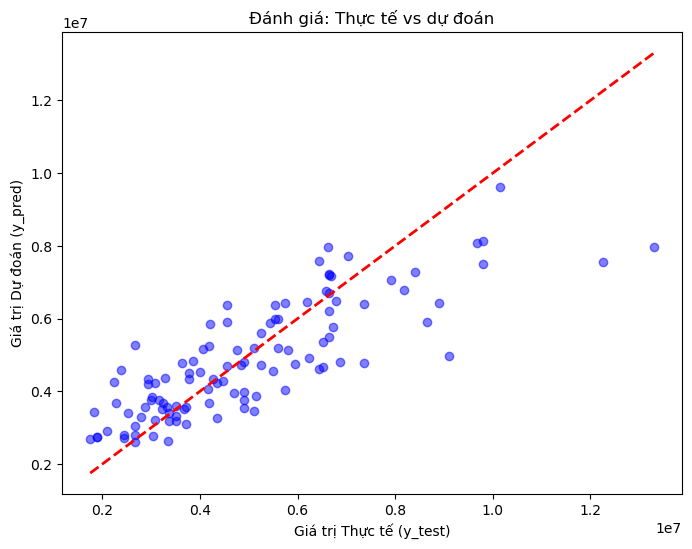

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Đường chéo đỏ
plt.xlabel('Giá trị Thực tế (y_test)')
plt.ylabel('Giá trị Dự đoán (y_pred)')
plt.title('Đánh giá: Thực tế vs dự đoán')
plt.show()

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Sai số tuyệt đối trung bình): {mae:,.2f}")
print(f"RMSE (Căn bậc hai sai số bình phương trung bình): {rmse:,.2f}")
print(f"R2 Score (Độ phù hợp): {r2:.4f}")

MAE (Sai số tuyệt đối trung bình): 970,043.40
RMSE (Căn bậc hai sai số bình phương trung bình): 1,324,506.96
R2 Score (Độ phù hợp): 0.6529
